#COVID-19 Xray Detection using Convolutional Nueral Network (CNN)



#What is COVID-19?
The 2019 novel coronavirus (COVID-19) presents several unique features. While the diagnosis is confirmed using polymerase chain reaction (PCR), infected patients with pneumonia may present on chest X-ray and computed tomography (CT) images with a pattern that is only moderately characteristic for the human eye Ng, 2020. COVID-19’s rate of transmission depends on our capacity to reliably identify infected patients with a low rate of false negatives. In addition, a low rate of false positives is required to avoid further increasing the burden on the healthcare system by unnecessarily exposing patients to quarantine if that is not required. Along with proper infection control, it is evident that timely detection of the disease would enable the implementation of all the supportive care required by patients affected by COVID-19.

In late January, a Chinese team published a paper detailing the clinical and paraclinical features of COVID-19. They reported that patients present abnormalities in chest CT images with most having bilateral involvement Huang 2020. Bilateral multiple lobular and subsegmental areas of consolidation constitute the typical findings in chest CT images of intensive care unit (ICU) patients on admission Huang 2020. In comparison, non-ICU patients show bilateral ground-glass opacity and subsegmental areas of consolidation in their chest CT images Huang 2020. In these patients, later chest CT images display bilateral ground-glass opacity with resolved consolidation Huang 2020.

COVID is possibly better diagnosed using radiological imaging Fang, 2020 and Ai 2020.

[1] Joseph Paul Cohen and Paul Morrison and Lan Dao. COVID-19 image data collection, arXiv, 2020. https://github.com/ieee8023/covid-chestxray-dataset

[2] https://github.com/JordanMicahBennett/SMART-CT-SCAN_BASED-COVID19_VIRUS_DETECTOR/



# Convolutional Neural Network (CNN)
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

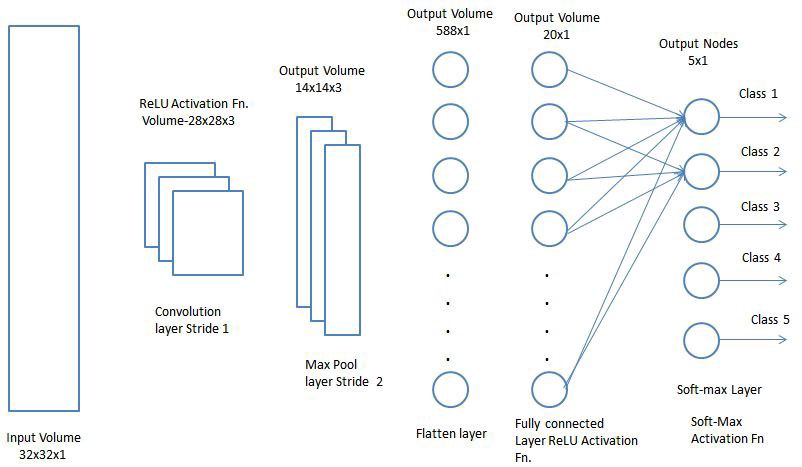

Adding a Fully-Connected layer is a (usually) cheap way of learning non-linear combinations of the high-level features as represented by the output of the convolutional layer. The Fully-Connected layer is learning a possibly non-linear function in that space.

Now that we have converted our input image into a suitable form for our Multi-Level Perceptron, we shall flatten the image into a column vector. The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training. Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them using the Softmax Classification technique.

There are various architectures of CNNs available which have been key in building algorithms which power and shall power AI as a whole in the foreseeable future. Some of them have been listed below:

1. LeNet
2. AlexNet
3. VGGNet
4. GoogLeNet
5. ResNet
6. ZFNet

For more information, please check it out : https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

##Project Goal
As we know, lung condition examination at the hospital takes a long time to see the results. Therefore, I created pneumonia detection to help doctors identify if there is an anomaly or something in the human lungs through x-ray images.

The trained model will be used to predict whether the uploaded image indicates pneumonia or normal.

##Let's Start It!

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

## Downlaod the datasets from Kaggle

the dataset I use to train the model is taken from Kaggle.

In [5]:
!kaggle datasets download khoongweihao/covid19-xray-dataset-train-test-sets

 96% 81.0M/84.3M [00:01<00:00, 66.3MB/s]
100% 84.3M/84.3M [00:01<00:00, 64.7MB/s]


In [6]:
!unzip covid19-xray-dataset-train-test-sets.zip

Archive:  covid19-xray-dataset-train-test-sets.zip
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0058-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0059-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0072-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0073-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0092-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0105-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0110-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0111-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0112-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0117-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0120

## Import Library

In [7]:
import tensorflow as tf
import cv2 
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## Data Exploration

In [8]:
train_dir = '/content/xray_dataset_covid19/train'
test_dir = '/content/xray_dataset_covid19/test'

In [9]:
classes=os.listdir(train_dir)
print(classes)

['PNEUMONIA', 'NORMAL']


In [10]:
data_num=[0,0]
for cl in classes:
    data_num[0]+=len(os.listdir(os.path.join(train_dir,cl)))
    data_num[1]+=len(os.listdir(os.path.join(test_dir,cl)))

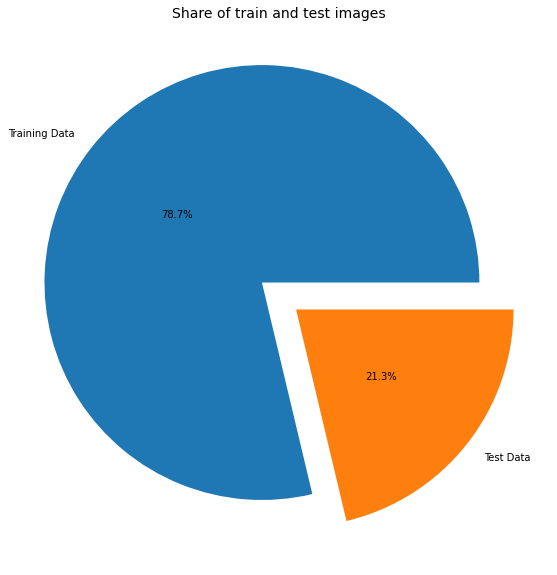

In [11]:
plt.figure(figsize=(15, 10))
plt.pie(x=np.array([x for x in data_num]), autopct="%.1f%%", explode=[0.1, 0.1], labels=["Training Data", "Test Data"], pctdistance=0.5)
plt.title("Share of train and test images", fontsize=14);

In [12]:
count={}
for x in classes:
    num=len(os.listdir(os.path.join(train_dir,x)))
    count[x]=num

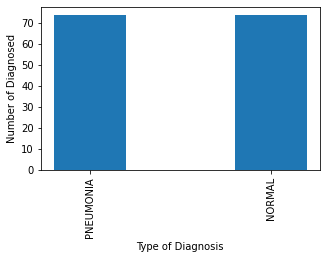

In [13]:
plt.figure(figsize=(5,3))
plt.bar(list(count.keys()), list(count.values()), width=0.4,align="center" )
plt.xticks(rotation=90)

plt.xlabel("Type of Diagnosis")
plt.ylabel("Number of Diagnosed")
plt.show()

## Checking Image for Confirmation
First, we will check the image for confirmation if it's normal or have pneunomia

## Pneunomia

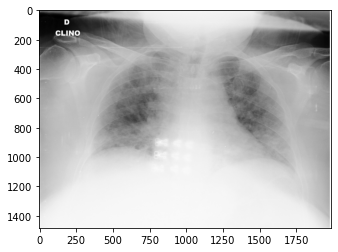

In [19]:
plt.imshow(cv2.imread('/content/xray_dataset_covid19/train/PNEUMONIA/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'))

###Normal

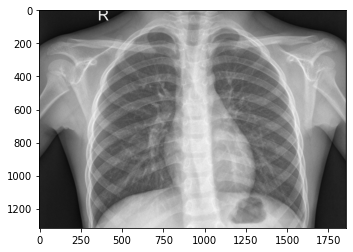

In [15]:
plt.imshow(cv2.imread('/content/xray_dataset_covid19/train/NORMAL/IM-0001-0001.jpeg'))

##Data Augmentation

To avoid overfitting, we will perform data augmentation.

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 148 images belonging to 2 classes.


In [21]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode ='binary')

Found 40 images belonging to 2 classes.


## Building the Model

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=200, activation='relu')) # 200 neuron
model.add(tf.keras.layers.Dropout(0.2)) # avoid overfitting with 20% dropout neuron
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # 0 - 1
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

## Train the Model

In [23]:
history = model.fit(x= training_set, validation_data = test_set, epochs = 20, verbose=1, shuffle=True)

Epoch 1/20
5/5 [==============================] - 16s 1s/step - loss: 0.7003 - accuracy: 0.5270 - val_loss: 0.6623 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 5s 974ms/step - loss: 0.6618 - accuracy: 0.6216 - val_loss: 0.6377 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 5s 1s/step - loss: 0.6585 - accuracy: 0.5743 - val_loss: 0.5346 - val_accuracy: 0.9500
Epoch 4/20
5/5 [==============================] - 5s 940ms/step - loss: 0.5776 - accuracy: 0.7635 - val_loss: 0.4202 - val_accuracy: 0.9750
Epoch 5/20
5/5 [==============================] - 5s 1s/step - loss: 0.4809 - accuracy: 0.8311 - val_loss: 0.2815 - val_accuracy: 0.9500
Epoch 6/20
5/5 [==============================] - 5s 1s/step - loss: 0.4507 - accuracy: 0.7973 - val_loss: 0.2467 - val_accuracy: 0.9250
Epoch 7/20
5/5 [==============================] - 5s 885ms/step - loss: 0.4211 - accuracy: 0.7973 - val_loss: 0.1229 - val_accuracy: 1.0000
Epoch 8/20
5/5 [===============

## Evaluate the Model

In [26]:
eval_result = model.evaluate(training_set)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

5/5 [==============================] - 4s 820ms/step - loss: 0.1277 - accuracy: 0.9527
loss rate at evaluation data : 0.12768256664276123
accuracy rate at evaluation data : 0.9527027010917664


<Figure size 432x288 with 0 Axes>

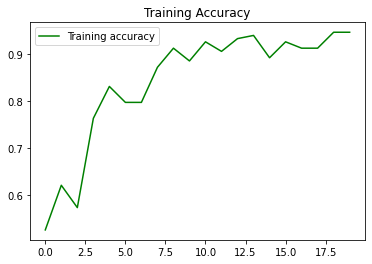

<Figure size 432x288 with 0 Axes>

In [30]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.figure()

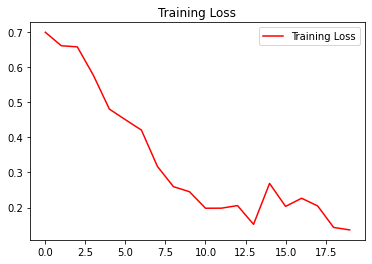

In [28]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

After build and train the model, we get our prediction accuracy is almost 100%. Thus, this model is ready to be used to predict human lung x-ray images.


## Image Prediction

The usual picture abnormality seen on CXR is opaque areas of the lung. Usually caused by benign/malignant neoplasms, granulomas (tuberculosis), infections (pneumoniae), vascular infarcts, varix, Wegener's granulomatosis, rheumatoid arthritis.

Saving SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg to SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
[1.]
SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg is covid risk


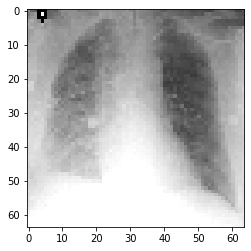

In [36]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(64,64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)
  print(classes[0])
  if classes[0]> 0.5:
    print(fn + ' is covid risk')
    plt.imshow(img)
  else:
    print(fn + ' is normal')
    plt.imshow(img)